In [95]:
import pandas as pd
import numpy as np
ev_data = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

In [96]:
print(ev_data)

        VIN (1-10)     County           City State  Postal Code  Model Year  \
0       5YJYGDEE1L       King        Seattle    WA      98122.0        2020   
1       7SAYGDEE9P  Snohomish        Bothell    WA      98021.0        2023   
2       5YJSA1E4XK       King        Seattle    WA      98109.0        2019   
3       5YJSA1E27G       King       Issaquah    WA      98027.0        2016   
4       5YJYGDEE5M     Kitsap      Suquamish    WA      98392.0        2021   
...            ...        ...            ...   ...          ...         ...   
177861  7SAYGDEE3N     Pierce    Bonney Lake    WA      98391.0        2022   
177862  KM8K23AG1P      Mason        Shelton    WA      98584.0        2023   
177863  5YJYGDEE6M      Grant         Quincy    WA      98848.0        2021   
177864  WVGKMPE27M       King  Black Diamond    WA      98010.0        2021   
177865  5YJ3E1EA8M     Pierce         Tacoma    WA      98422.0        2021   

              Make          Model           Electri

In [97]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [98]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [99]:
ev_data = ev_data.dropna()

In [100]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

In [101]:
ev_data.head(3)


VIN (1-10)     County     City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King  Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish  Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King  Seattle    WA      98109.0        2019  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle Eligible             270   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  37.0       125701579   
1          0                   1.0       244285107   
2          0                  36.0       156773144   

                Vehicle Location  \
0   POINT (-122.30839 47.610365)   
1  POINT (-122.179458 47.802589)   
2   POINT (-122.34848 47.632405)   

                               Electric Utility  2020 Census Tract  
0  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
1                        PUGET SOUND ENERGY INC       5.306105e+10  
2  CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10

<ipython-input-102-84129f35faae>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette='viridis')


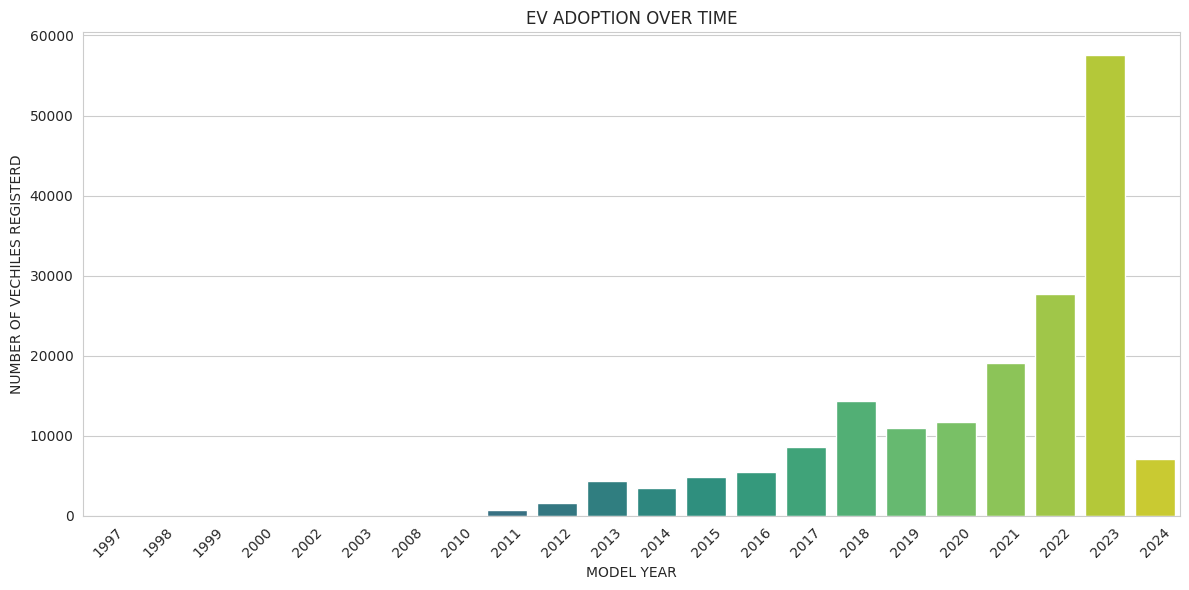

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(12,6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette='viridis')
plt.title('EV ADOPTION OVER TIME')
plt.xlabel('MODEL YEAR')
plt.ylabel('NUMBER OF VECHILES REGISTERD')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# From the above bar chart, it’s clear that EV adoption has been increasing over time, especially noting a significant upward trend starting around 2016. The number of vehicles registered grows modestly up until that point and then begins to rise more rapidly from 2017 onwards. The year 2023 shows a particularly sharp increase in the number of registered EVs, with the bar for 2023 being the highest on the graph, indicating a peak in EV adoption.

**Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:**

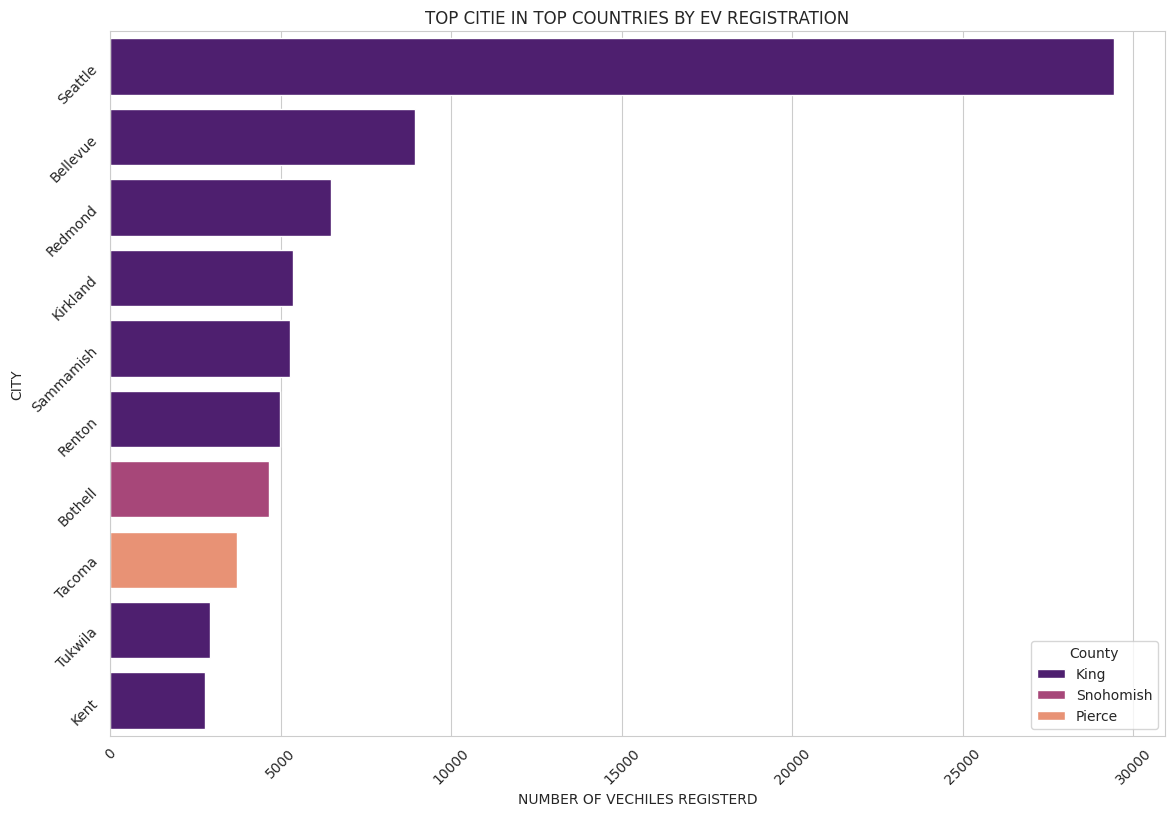

In [103]:
ev_country_distribution = ev_data['County'].value_counts()
top_countries = ev_country_distribution.head(3).index
top_countries_data = ev_data[ev_data['County'].isin(top_countries)]
ev_city_distribution_top_countries = top_countries_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of vechiles')
top_cities = ev_city_distribution_top_countries.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of vechiles',y='City',hue='County',data=top_cities,palette='magma')
plt.title('TOP CITIE IN TOP COUNTRIES BY EV REGISTRATION')
plt.xlabel('NUMBER OF VECHILES REGISTERD')
plt.ylabel('CITY')
plt.legend(title='County')
plt.tight_layout()
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [104]:
top_cities

County       City  Number of vechiles
0       King    Seattle               29447
1       King   Bellevue                8930
2       King    Redmond                6478
3       King   Kirkland                5362
4       King  Sammamish                5280
5       King     Renton                4980
6  Snohomish    Bothell                4663
7     Pierce     Tacoma                3722
8       King    Tukwila                2927
9       King       Kent                2782

In [105]:
ev_city_distribution_top_countries

County             City  Number of vechiles
0         King          Seattle               29447
1         King         Bellevue                8930
2         King          Redmond                6478
3         King         Kirkland                5362
4         King        Sammamish                5280
..         ...              ...                 ...
108  Snohomish  Alderwood Manor                   1
109  Snohomish          Startup                   1
110       King         Gold Bar                   1
111     Pierce         Kapowsin                   1
112     Pierce    Prairie Ridge                   1

[113 rows x 3 columns]

In [106]:
top_countries_data

VIN (1-10)     County           City State  Postal Code  Model Year  \
0       5YJYGDEE1L       King        Seattle    WA      98122.0        2020   
1       7SAYGDEE9P  Snohomish        Bothell    WA      98021.0        2023   
2       5YJSA1E4XK       King        Seattle    WA      98109.0        2019   
3       5YJSA1E27G       King       Issaquah    WA      98027.0        2016   
7       KNAGV4LD9J  Snohomish        Bothell    WA      98012.0        2018   
...            ...        ...            ...   ...          ...         ...   
177858  5YJ3E1EB8N  Snohomish      Snohomish    WA      98296.0        2022   
177859  1N4BZ1DV7M       King        Redmond    WA      98053.0        2021   
177861  7SAYGDEE3N     Pierce    Bonney Lake    WA      98391.0        2022   
177864  WVGKMPE27M       King  Black Diamond    WA      98010.0        2021   
177865  5YJ3E1EA8M     Pierce         Tacoma    WA      98422.0        2021   

              Make    Model                   Electric Vehicle Type  \
0            TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
1            TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
2            TESLA  MODEL S          Battery Electric Vehicle (BEV)   
3            TESLA  MODEL S          Battery Electric Vehicle (BEV)   
7              KIA   OPTIMA  Plug-in Hybrid Electric Vehicle (PHEV)   
...            ...      ...                                     ...   
177858       TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
177859      NISSAN     LEAF          Battery Electric Vehicle (BEV)   
177861       TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
177864  VOLKSWAGEN     ID.4          Battery Electric Vehicle (BEV)   
177865       TESLA  MODEL 3          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible             291   
1       Eligibility unknown as battery range has not b...               0   
2                 Clean Alternative Fuel Vehicle Eligible             270   
3                 Clean Alternative Fuel Vehicle Eligible             210   
7                   Not eligible due to low battery range              29   
...                                                   ...             ...   
177858  Eligibility unknown as battery range has not b...               0   
177859  Eligibility unknown as battery range has not b...               0   
177861  Eligibility unknown as battery range has not b...               0   
177864  Eligibility unknown as battery range has not b...               0   
177865  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  37.0       125701579   
1               0                   1.0       244285107   
2               0                  36.0       156773144   
3               0                   5.0       165103011   
7               0                   1.0       290605598   
...           ...                   ...             ...   
177858          0                   1.0       213520422   
177859          0                  45.0       172798951   
177861          0                  31.0       195224452   
177864          0                   5.0       182448801   
177865          0                  27.0       211464683   

                       Vehicle Location  \
0          POINT (-122.30839 47.610365)   
1         POINT (-122.179458 47.802589)   
2          POINT (-122.34848 47.632405)   
3          POINT (-122.03646 47.534065)   
7           POINT (-122.1873 47.820245)   
...                                 ...   
177858    POINT (-122.15134 47.8851158)   
177859  POINT (-122.0222799 47.6958998)   
177861     POINT (-122.183805 47.18062)   
177864     POINT (-122.00451 47.312185)   
177865      POINT (-122.38578 47.28971)   

                                         Electric Utili

In [107]:
top_countries

Index(['King', 'Snohomish', 'Pierce'], dtype='object', name='County')

In [108]:
ev_country_distribution

County
King            92740
Snohomish       21001
Pierce          13782
Clark           10409
Thurston         6428
Kitsap           5840
Spokane          4586
Whatcom          4253
Benton           2147
Skagit           1910
Island           1882
Clallam          1058
Chelan           1047
Yakima            995
Jefferson         974
San Juan          942
Cowlitz           897
Mason             823
Lewis             739
Grays Harbor      625
Kittitas          623
Franklin          585
Grant             561
Walla Walla       437
Douglas           364
Whitman           334
Klickitat         284
Okanogan          263
Stevens           219
Pacific           198
Skamania          192
Asotin             73
Wahkiakum          60
Pend Oreille       55
Lincoln            49
Adams              48
Ferry              31
Columbia           16
Garfield            3
Name: count, dtype: int64

The above graph compares the number of electric vehicles registered in various cities within three counties: **King,** **Snohomish**, and **Pierce.** The horizontal bars represent cities, and their length corresponds to the number of vehicles registered, colour-coded by county. Here are the key findings from the above graph:

**Seattle**, which is in King County, has the highest number of EV registrations by a significant margin, far outpacing the other cities listed.
**Bellevue and Redmond**, also in King County, follow Seattle with the next highest registrations, though these are considerably less than Seattle’s.
**Cities in Snohomish County**, such as Kirkland and Sammamish, show moderate EV registrations.
**Tacoma and Tukwila**, representing Pierce County, have the fewest EV registrations among the cities listed, with Tacoma slightly ahead of Tukwila.
The majority of cities shown are from King County, which seems to dominate EV registrations among the three counties.
Overall, the graph indicates that EV adoption is not uniform across the cities and is more concentrated in certain areas, particularly in King County.

<ipython-input-109-ca4dd4ee4b43>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index,palette='rocket')


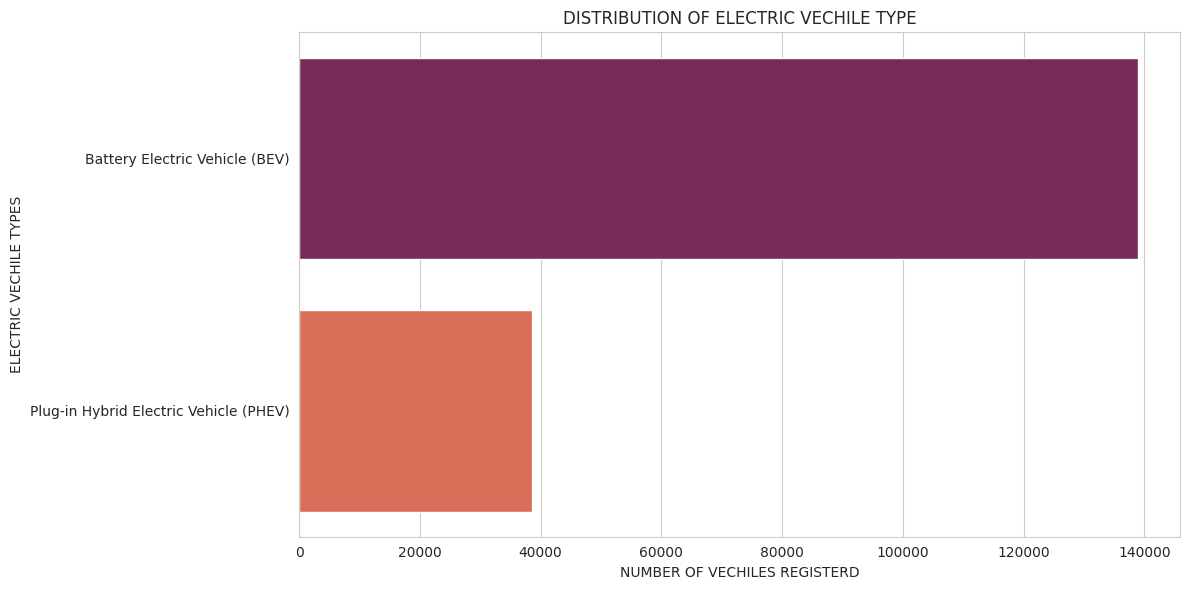

In [109]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=ev_type_distribution.values,y=ev_type_distribution.index,palette='rocket')
plt.title('DISTRIBUTION OF ELECTRIC VECHILE TYPE')
plt.xlabel('NUMBER OF VECHILES REGISTERD')
plt.ylabel('ELECTRIC VECHILE TYPES')
plt.tight_layout()
plt.show()

In [110]:
ev_type_distribution

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

**The above graph shows that BEVs are more popular or preferred over PHEVs among the electric vehicles registered in the United States.**

In [111]:
# the most popular manufacturers
#and then drill down into the most popular models within those manufacturers:

<ipython-input-112-f5e1d0127ec6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette='cubehelix')


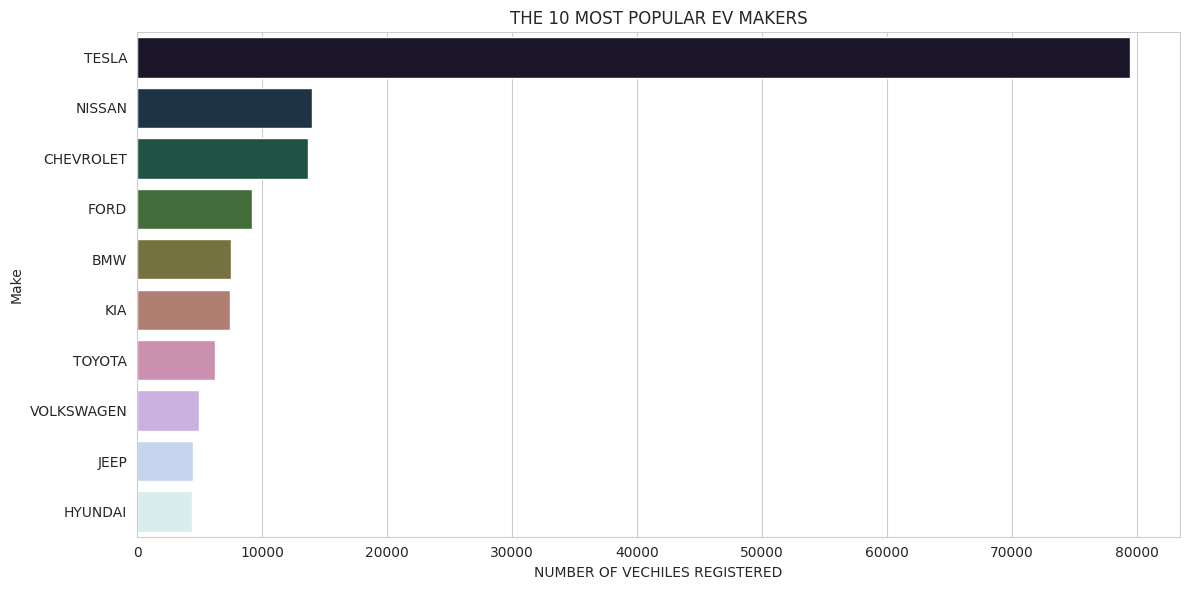

In [112]:
ev_make_distribution = ev_data['Make'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=ev_make_distribution.values,y=ev_make_distribution.index,palette='cubehelix')
plt.title('THE 10 MOST POPULAR EV MAKERS')
plt.xlabel('NUMBER OF VECHILES REGISTERED')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [113]:
ev_make_distribution

Make
TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: count, dtype: int64

The above chart shows that:

**TESLA** leads by a substantial margin with the highest number of vehicles registered.
**NISSAN** is the second most popular manufacturer, followed by **CHEVROLET**, though both have significantly fewer registrations than **TESLA.**
**FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP**, and **HYUNDAI** follow in decreasing order of the number of registered vehicles.

<function matplotlib.pyplot.show(close=None, block=None)>

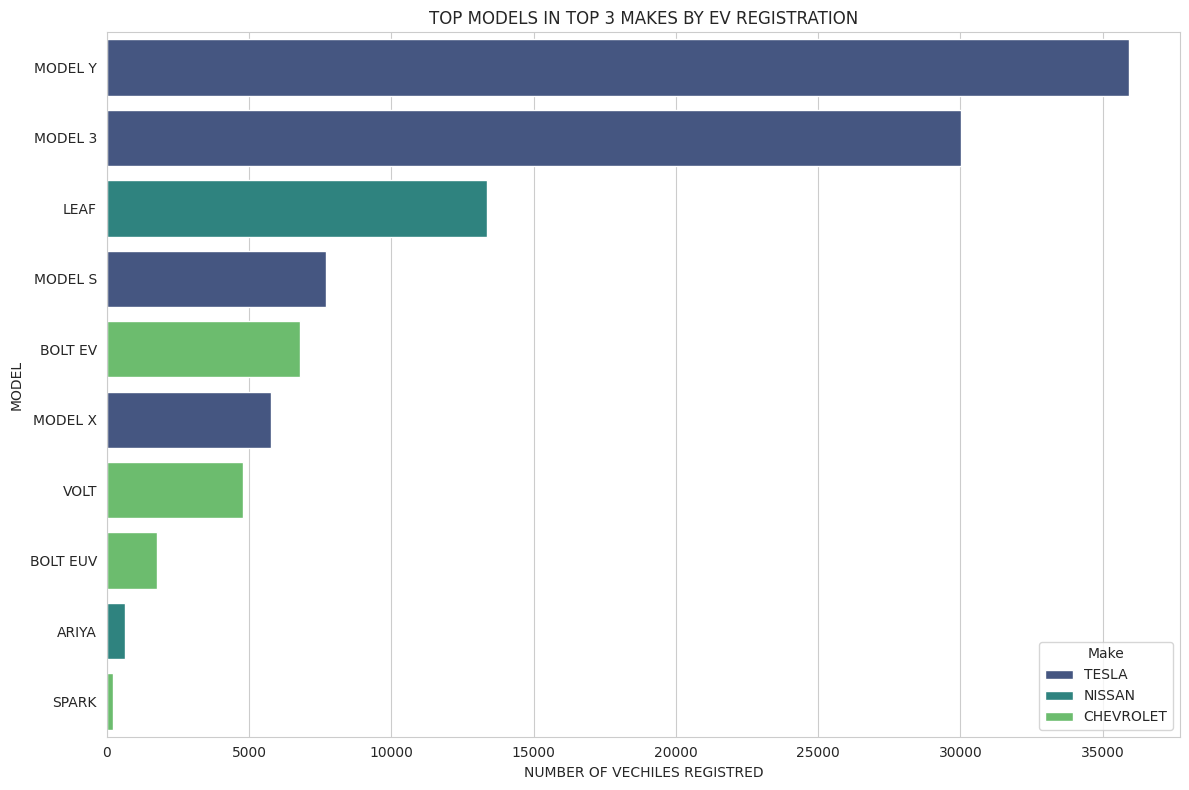

In [114]:
# selecting the top 3 manfacuring based on the number of vechiles reg
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturing
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analysing the popularity of ev models within these top manufactures
ev_model_distribution_top_makes = top_makes_data.groupby(['Make','Model']).size().sort_values(ascending=False).reset_index(name='Number of vechiles')

# visualizing the top 10 makes across these manufactures for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12,8))
sns.barplot(x='Number of vechiles', y='Model',hue='Make', data=top_models,palette='viridis')
plt.title('TOP MODELS IN TOP 3 MAKES BY EV REGISTRATION')
plt.xlabel('NUMBER OF VECHILES REGISTRED')
plt.ylabel('MODEL')
plt.legend(title='Make',loc='lower right')
plt.tight_layout()
plt.show


In [115]:
ev_model_distribution_top_makes

Make         Model  Number of vechiles
0       TESLA       MODEL Y               35921
1       TESLA       MODEL 3               30009
2      NISSAN          LEAF               13352
3       TESLA       MODEL S                7711
4   CHEVROLET       BOLT EV                6811
5       TESLA       MODEL X                5784
6   CHEVROLET          VOLT                4782
7   CHEVROLET      BOLT EUV                1770
8      NISSAN         ARIYA                 632
9   CHEVROLET         SPARK                 240
10      TESLA      ROADSTER                  46
11  CHEVROLET  SILVERADO EV                  33
12  CHEVROLET     BLAZER EV                  14
13  CHEVROLET   S-10 PICKUP                   1

In [116]:
top_makes_data


VIN (1-10)     County         City State  Postal Code  Model Year  \
0       5YJYGDEE1L       King      Seattle    WA      98122.0        2020   
1       7SAYGDEE9P  Snohomish      Bothell    WA      98021.0        2023   
2       5YJSA1E4XK       King      Seattle    WA      98109.0        2019   
3       5YJSA1E27G       King     Issaquah    WA      98027.0        2016   
4       5YJYGDEE5M     Kitsap    Suquamish    WA      98392.0        2021   
...            ...        ...          ...   ...          ...         ...   
177859  1N4BZ1DV7M       King      Redmond    WA      98053.0        2021   
177860  1G1FX6S00J    Clallam       Sequim    WA      98382.0        2018   
177861  7SAYGDEE3N     Pierce  Bonney Lake    WA      98391.0        2022   
177863  5YJYGDEE6M      Grant       Quincy    WA      98848.0        2021   
177865  5YJ3E1EA8M     Pierce       Tacoma    WA      98422.0        2021   

             Make    Model           Electric Vehicle Type  \
0           TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
1           TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
2           TESLA  MODEL S  Battery Electric Vehicle (BEV)   
3           TESLA  MODEL S  Battery Electric Vehicle (BEV)   
4           TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
...           ...      ...                             ...   
177859     NISSAN     LEAF  Battery Electric Vehicle (BEV)   
177860  CHEVROLET  BOLT EV  Battery Electric Vehicle (BEV)   
177861      TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
177863      TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
177865      TESLA  MODEL 3  Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible             291   
1       Eligibility unknown as battery range has not b...               0   
2                 Clean Alternative Fuel Vehicle Eligible             270   
3                 Clean Alternative Fuel Vehicle Eligible             210   
4       Eligibility unknown as battery range has not b...               0   
...                                                   ...             ...   
177859  Eligibility unknown as battery range has not b...               0   
177860            Clean Alternative Fuel Vehicle Eligible             238   
177861  Eligibility unknown as battery range has not b...               0   
177863  Eligibility unknown as battery range has not b...               0   
177865  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  37.0       125701579   
1               0                   1.0       244285107   
2               0                  36.0       156773144   
3               0                   5.0       165103011   
4               0                  23.0       205138552   
...           ...                   ...             ...   
177859          0                  45.0       172798951   
177860          0                  24.0       347972607   
177861          0                  31.0       195224452   
177863          0                  13.0       168797219   
177865          0                  27.0       211464683   

                       Vehicle Location  \
0          POINT (-122.30839 47.610365)   
1         POINT (-122.179458 47.802589)   
2          POINT (-122.34848 47.632405)   
3          POINT (-122.03646 47.534065)   
4          POINT (-122.55717 47.733415)   
...                                 ...   
177859  POINT (-122.0222799 47.6958998)   
177860     POINT (-123.105015 48.08125)   
177861     POINT (-122.183805 47.18062)   
177863  POINT (-119.8493873 47.2339933)   
177865      POINT (-122.38578 47.28971)   

                                         Electric Utility  2020 Census Tract  
0            CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
1                            

The above graph shows the distribution of electric vehicle registrations among different models from the top three manufacturers: **TESLA, NISSAN, and CHEVROLET**
. Here are the findings:

TESLA’s MODEL Y and MODEL 3 are the most registered vehicles, with MODEL Y having the highest number of registrations.
NISSAN’s LEAF is the third most registered model and the most registered non-TESLA vehicle.
TESLA’s MODEL S and MODEL X also have a significant number of registrations.
CHEVROLET’s BOLT EV and VOLT are the next in the ranking with considerable registrations, followed by BOLT EUV.
NISSAN’s ARIYA and CHEVROLET’s SPARK have the least number of registrations among the models shown.

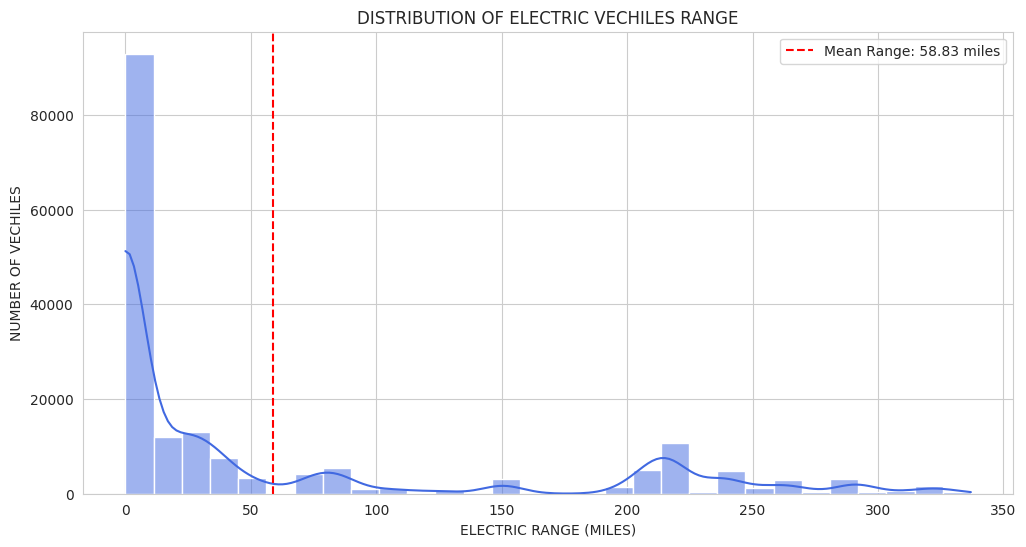

In [117]:
# analyzing the distribution of electric range
plt.figure(figsize=(12,6))
sns.histplot(ev_data['Electric Range'],bins=30,kde=True,color='royalblue')
plt.title('DISTRIBUTION OF ELECTRIC VECHILES RANGE')
import matplotlib.pyplot as plt

plt.xlabel('ELECTRIC RANGE (MILES)')
plt.ylabel('NUMBER OF VECHILES')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

The above graph shows the mean electric range. Key observations from the graph include:

There is a high frequency of vehicles with a low electric range, with a significant peak occurring just before 50 miles.
The distribution is skewed to the right, with a long tail extending towards higher ranges, although the number of vehicles with higher ranges is much less frequent.
The mean electric range for this set of vehicles is marked at approximately 58.84 miles, which is relatively low compared to the highest ranges shown in the graph.
Despite the presence of electric vehicles with ranges that extend up to around 350 miles, the majority of the vehicles have a range below the mean.
It suggests that while there are EVs available with high electric ranges, the average range is skewed lower due to a substantial number of vehicles with shorter ranges.

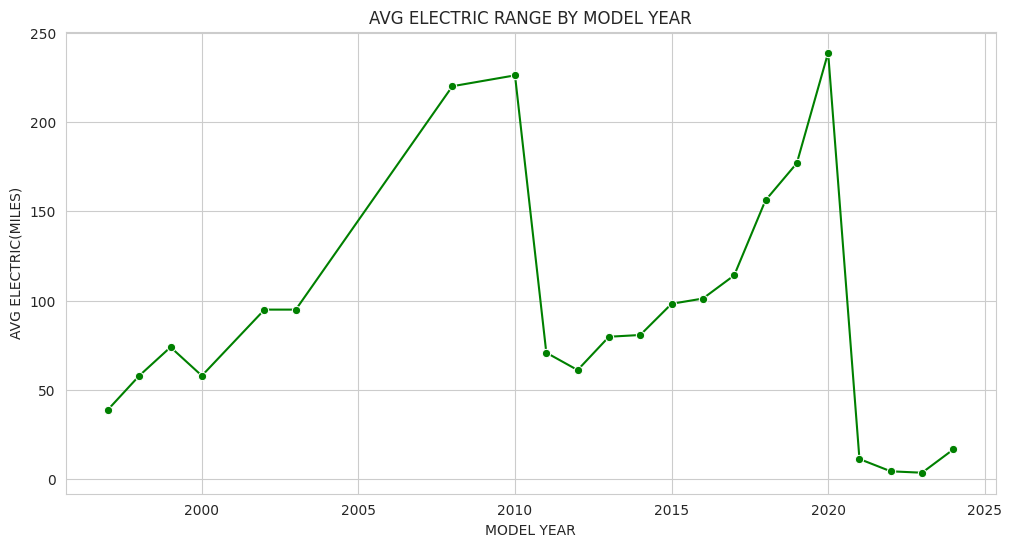

In [118]:
# calucalating the average electric range by the model year

avg_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='Model Year',y='Electric Range',data=avg_range_by_year,marker='o',color='green')


plt.title('AVG ELECTRIC RANGE BY MODEL YEAR')
plt.xlabel('MODEL YEAR')
plt.ylabel('AVG ELECTRIC(MILES)')
plt.grid(True)
plt.show()


In [119]:
avg_range_by_year

Model Year  Electric Range
0         1997       39.000000
1         1998       58.000000
2         1999       74.000000
3         2000       58.000000
4         2002       95.000000
5         2003       95.000000
6         2008      220.000000
7         2010      226.086957
8         2011       70.891613
9         2012       61.172243
10        2013       79.822232
11        2014       80.798341
12        2015       98.254869
13        2016      101.197111
14        2017      114.162292
15        2018      156.165967
16        2019      176.918904
17        2020      238.748978
18        2021       11.402665
19        2022        4.518045
20        2023        3.729168
21        2024       16.791431

The above graph shows the progression of the average electric range of vehicles from around the year 2000 to 2024. Key findings from the graph:

There is a general upward trend in the average electric range of EVs over the years, indicating improvements in technology and battery efficiency.
There is a noticeable peak around the year 2020 when the average range reaches its highest point.
Following 2020, there’s a significant drop in the average range, which could indicate that data for the following years might be incomplete or reflect the introduction of several lower-range models.
After the sharp decline, there is a slight recovery in the average range in the most recent year shown on the graph.

The data suggest that while there have been fluctuations, the overall trend over the last two decades has been toward increasing the electric range of EVs.

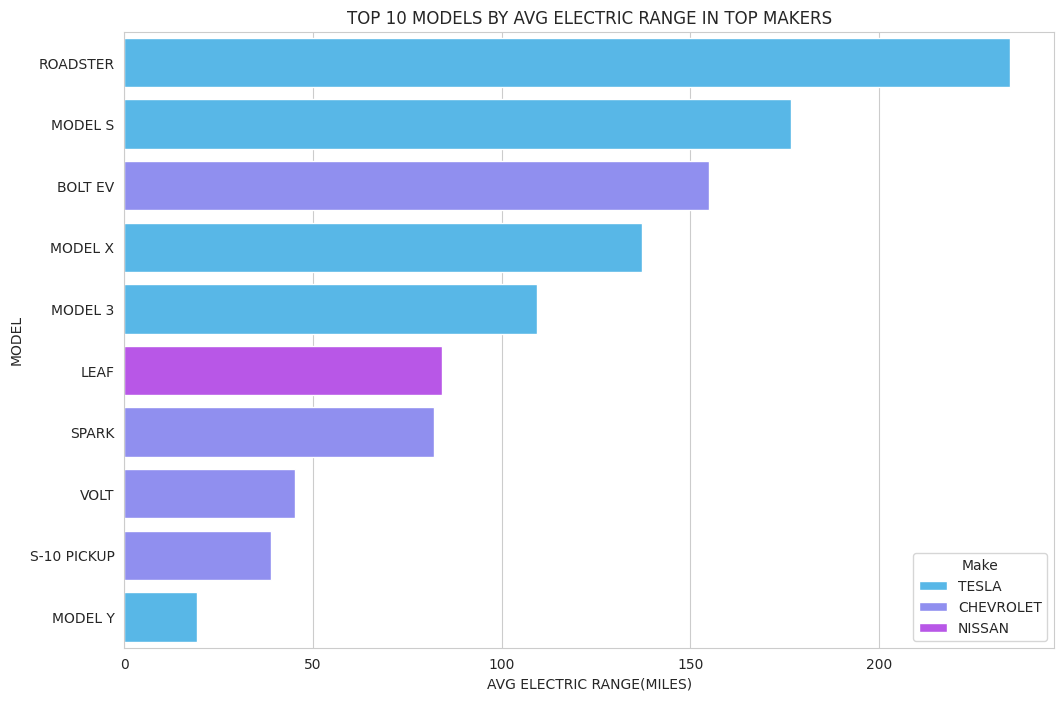

In [120]:
avg_range_by_model = top_makes_data.groupby(['Make','Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_range_models=avg_range_by_model.head(10)
plt.figure(figsize=(12,8))
sns.barplot(x='Electric Range',y='Model',hue='Make',data=top_range_models,palette='cool')
plt.title('TOP 10 MODELS BY AVG ELECTRIC RANGE IN TOP MAKERS')
plt.xlabel('AVG ELECTRIC RANGE(MILES)')
plt.ylabel('MODEL')
plt.legend(title='Make',loc='lower right')
plt.show()

In [121]:
top_range_models

Make        Model  Electric Range
0      TESLA     ROADSTER      234.673913
1      TESLA      MODEL S      176.794449
2  CHEVROLET      BOLT EV      154.857143
3      TESLA      MODEL X      137.192600
4      TESLA      MODEL 3      109.463028
5     NISSAN         LEAF       84.148742
6  CHEVROLET        SPARK       82.000000
7  CHEVROLET         VOLT       45.365119
8  CHEVROLET  S-10 PICKUP       39.000000
9      TESLA      MODEL Y       19.191531

In [122]:
avg_range_by_model

Make         Model  Electric Range
0       TESLA      ROADSTER      234.673913
1       TESLA       MODEL S      176.794449
2   CHEVROLET       BOLT EV      154.857143
3       TESLA       MODEL X      137.192600
4       TESLA       MODEL 3      109.463028
5      NISSAN          LEAF       84.148742
6   CHEVROLET         SPARK       82.000000
7   CHEVROLET          VOLT       45.365119
8   CHEVROLET   S-10 PICKUP       39.000000
9       TESLA       MODEL Y       19.191531
10  CHEVROLET     BLAZER EV        0.000000
11  CHEVROLET      BOLT EUV        0.000000
12  CHEVROLET  SILVERADO EV        0.000000
13     NISSAN         ARIYA        0.000000

In [123]:
top_makes_data

VIN (1-10)     County         City State  Postal Code  Model Year  \
0       5YJYGDEE1L       King      Seattle    WA      98122.0        2020   
1       7SAYGDEE9P  Snohomish      Bothell    WA      98021.0        2023   
2       5YJSA1E4XK       King      Seattle    WA      98109.0        2019   
3       5YJSA1E27G       King     Issaquah    WA      98027.0        2016   
4       5YJYGDEE5M     Kitsap    Suquamish    WA      98392.0        2021   
...            ...        ...          ...   ...          ...         ...   
177859  1N4BZ1DV7M       King      Redmond    WA      98053.0        2021   
177860  1G1FX6S00J    Clallam       Sequim    WA      98382.0        2018   
177861  7SAYGDEE3N     Pierce  Bonney Lake    WA      98391.0        2022   
177863  5YJYGDEE6M      Grant       Quincy    WA      98848.0        2021   
177865  5YJ3E1EA8M     Pierce       Tacoma    WA      98422.0        2021   

             Make    Model           Electric Vehicle Type  \
0           TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
1           TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
2           TESLA  MODEL S  Battery Electric Vehicle (BEV)   
3           TESLA  MODEL S  Battery Electric Vehicle (BEV)   
4           TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
...           ...      ...                             ...   
177859     NISSAN     LEAF  Battery Electric Vehicle (BEV)   
177860  CHEVROLET  BOLT EV  Battery Electric Vehicle (BEV)   
177861      TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
177863      TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
177865      TESLA  MODEL 3  Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible             291   
1       Eligibility unknown as battery range has not b...               0   
2                 Clean Alternative Fuel Vehicle Eligible             270   
3                 Clean Alternative Fuel Vehicle Eligible             210   
4       Eligibility unknown as battery range has not b...               0   
...                                                   ...             ...   
177859  Eligibility unknown as battery range has not b...               0   
177860            Clean Alternative Fuel Vehicle Eligible             238   
177861  Eligibility unknown as battery range has not b...               0   
177863  Eligibility unknown as battery range has not b...               0   
177865  Eligibility unknown as battery range has not b...               0   

        Base MSRP  Legislative District  DOL Vehicle ID  \
0               0                  37.0       125701579   
1               0                   1.0       244285107   
2               0                  36.0       156773144   
3               0                   5.0       165103011   
4               0                  23.0       205138552   
...           ...                   ...             ...   
177859          0                  45.0       172798951   
177860          0                  24.0       347972607   
177861          0                  31.0       195224452   
177863          0                  13.0       168797219   
177865          0                  27.0       211464683   

                       Vehicle Location  \
0          POINT (-122.30839 47.610365)   
1         POINT (-122.179458 47.802589)   
2          POINT (-122.34848 47.632405)   
3          POINT (-122.03646 47.534065)   
4          POINT (-122.55717 47.733415)   
...                                 ...   
177859  POINT (-122.0222799 47.6958998)   
177860     POINT (-123.105015 48.08125)   
177861     POINT (-122.183805 47.18062)   
177863  POINT (-119.8493873 47.2339933)   
177865      POINT (-122.38578 47.28971)   

                                         Electric Utility  2020 Census Tract  
0            CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
1                            

The TESLA ROADSTER has the highest average electric range among the models listed. TESLA’s models (ROADSTER, MODEL S, MODEL X, and MODEL 3) occupy the majority of the top positions, indicating that on average, TESLA’s vehicles have higher electric ranges. The CHEVROLET BOLT EV is an outlier among the CHEVROLET models, having a substantially higher range than the VOLT and S-10 PICKUP from the same maker. NISSAN’s LEAF and CHEVROLET’s SPARK are in the lower half of the chart, suggesting more modest average ranges.

In [124]:
# calucalating the number of ev's registered each year...
ev_reg_counts = ev_data['Model Year'].value_counts()
new_ev_reg_counts = ev_reg_counts.sort_index()
new_ev_reg_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

The dataset provides the number of electric vehicles registered each year from 1997 through 2024. However, the data for 2024 is incomplete as it only contains the data till March. Here’s a summary of EV registrations for recent years:

In 2021, there were 19,063 EVs registered.
In 2022, the number increased to 27708 EVs.
In 2023, a significant jump to 57,519 EVs was observed.
For 2024, currently, 7,072 EVs are registered, which suggests partial data.
To forecast the total number of EVs expected to be registered in 2024, we can use a growth rate based approach from previous complete years.